# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, pairwise_distances_argmin_min, silhouette_score
from IPython.display import display

# Reading Data

In [2]:
audi = pd.read_csv(r'C:\Users\samue\Downloads\Data\UK Used Cars\audi.csv')
bmw = pd.read_csv(r'C:\Users\samue\Downloads\Data\UK Used Cars\bmw.csv')
ford = pd.read_csv(r'C:\Users\samue\Downloads\Data\UK Used Cars\ford.csv')
hyundi = pd.read_csv(r'C:\Users\samue\Downloads\Data\UK Used Cars\hyundi.csv')
merc = pd.read_csv(r'C:\Users\samue\Downloads\Data\UK Used Cars\merc.csv')
skoda = pd.read_csv(r'C:\Users\samue\Downloads\Data\UK Used Cars\skoda.csv')
toyota = pd.read_csv(r'C:\Users\samue\Downloads\Data\UK Used Cars\toyota.csv')
vauxhall = pd.read_csv(r'C:\Users\samue\Downloads\Data\UK Used Cars\vauxhall.csv')
vw = pd.read_csv(r'C:\Users\samue\Downloads\Data\UK Used Cars\vw.csv')

df_list = [audi, bmw, ford, hyundi, merc, skoda, toyota, vauxhall, vw]

for df in df_list:
    display(df.head(1))

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4


,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,5 Series,2014,11200,Automatic,67068,Diesel,125,57.6,2.0


,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0


,model,year,price,transmission,mileage,fuelType,tax(£),mpg,engineSize
0,I20,2017,7999,Manual,17307,Petrol,145,58.9,1.2


,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,SLK,2005,5200,Automatic,63000,Petrol,325,32.1,1.8


,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Octavia,2017,10550,Manual,25250,Petrol,150,54.3,1.4


,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,GT86,2016,16000,Manual,24089,Petrol,265,36.2,2.0


,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Corsa,2018,7885,Manual,9876,Petrol,145,55.4,1.4


,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,T-Roc,2019,25000,Automatic,13904,Diesel,145,49.6,2.0


Renaming column to be uniform

In [3]:
hyundi.rename(columns = {'tax(£)' : 'tax'}, inplace = True)

Appending manufacture to each dataframe

In [4]:
manufacturer_names = ['Audi', 'BMW', 'Ford', 'Hyundi', 'Mercedes', 'Skoda', 'Toyota', 'Vauxhall', 'Volkswagen']

for df, manufacturer_name in zip(df_list, manufacturer_names):
    df['manufacturer'] = manufacturer_name

for df in df_list:
    display(df.head(1))

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,manufacturer
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4,Audi


,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,manufacturer
0,5 Series,2014,11200,Automatic,67068,Diesel,125,57.6,2.0,BMW


,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,manufacturer
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0,Ford


,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,manufacturer
0,I20,2017,7999,Manual,17307,Petrol,145,58.9,1.2,Hyundi


,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,manufacturer
0,SLK,2005,5200,Automatic,63000,Petrol,325,32.1,1.8,Mercedes


,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,manufacturer
0,Octavia,2017,10550,Manual,25250,Petrol,150,54.3,1.4,Skoda


,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,manufacturer
0,GT86,2016,16000,Manual,24089,Petrol,265,36.2,2.0,Toyota


,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,manufacturer
0,Corsa,2018,7885,Manual,9876,Petrol,145,55.4,1.4,Vauxhall


,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,manufacturer
0,T-Roc,2019,25000,Automatic,13904,Diesel,145,49.6,2.0,Volkswagen


Concatinating dataframes together

In [5]:
df = pd.concat(df_list)

# Cleaning Data

Checking non-null values

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99187 entries, 0 to 15156
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         99187 non-null  object 
 1   year          99187 non-null  int64  
 2   price         99187 non-null  int64  
 3   transmission  99187 non-null  object 
 4   mileage       99187 non-null  int64  
 5   fuelType      99187 non-null  object 
 6   tax           99187 non-null  int64  
 7   mpg           99187 non-null  float64
 8   engineSize    99187 non-null  float64
 9   manufacturer  99187 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 8.3+ MB


Checking unique values

In [7]:
df.nunique()

model             195
year               27
price           13236
transmission        4
mileage         42214
fuelType            5
tax                48
mpg               208
engineSize         40
manufacturer        9
dtype: int64

Stripping car model names

In [8]:
print(df['model'].unique())

[' A1' ' A6' ' A4' ' A3' ' Q3' ' Q5' ' A5' ' S4' ' Q2' ' A7' ' TT' ' Q7'
 ' RS6' ' RS3' ' A8' ' Q8' ' RS4' ' RS5' ' R8' ' SQ5' ' S8' ' SQ7' ' S3'
 ' S5' ' A2' ' RS7' ' 5 Series' ' 6 Series' ' 1 Series' ' 7 Series'
 ' 2 Series' ' 4 Series' ' X3' ' 3 Series' ' X5' ' X4' ' i3' ' X1' ' M4'
 ' X2' ' X6' ' 8 Series' ' Z4' ' X7' ' M5' ' i8' ' M2' ' M3' ' M6' ' Z3'
 ' Fiesta' ' Focus' ' Puma' ' Kuga' ' EcoSport' ' C-MAX' ' Mondeo' ' Ka+'
 ' Tourneo Custom' ' S-MAX' ' B-MAX' ' Edge' ' Tourneo Connect'
 ' Grand C-MAX' ' KA' ' Galaxy' ' Mustang' ' Grand Tourneo Connect'
 ' Fusion' ' Ranger' ' Streetka' ' Escort' ' Transit Tourneo' ' I20'
 ' Tucson' ' I10' ' IX35' ' I30' ' I40' ' Ioniq' ' Kona' ' Veloster'
 ' I800' ' IX20' ' Santa Fe' ' Accent' ' Terracan' ' Getz' ' Amica' ' SLK'
 ' S Class' ' SL CLASS' ' G Class' ' GLE Class' ' GLA Class' ' A Class'
 ' B Class' ' GLC Class' ' C Class' ' E Class' ' GL Class' ' CLS Class'
 ' CLC Class' ' CLA Class' ' V Class' ' M Class' ' CL Class' ' GLS Class'
 ' 

In [9]:
df['model'] = df['model'].str.strip()

Creating manufacturer model column for clarity

In [10]:
df['manufacturerModel'] = df['manufacturer'] + ' ' + df['model']

Dropping old and erroneous years

In [11]:
df.year.value_counts()

year
2019    26771
2017    21733
2016    15850
2018    13664
2015     7645
2020     4465
2014     4085
2013     2603
2012      634
2011      432
2010      340
2009      278
2008      200
2007      163
2006       86
2005       69
2004       52
2003       34
2002       31
2001       20
2000        9
1998        8
1999        6
1997        4
1996        2
1970        2
2060        1
Name: count, dtype: int64

In [12]:
df = df[(df['year'] >= 2000) & (df['year'] <= 2021)]

Dropping rows with transmission and fuel type 'Other' as well as electric cars

In [13]:
df.transmission.value_counts().sort_values(ascending = False)

transmission
Manual       56435
Semi-Auto    22677
Automatic    20043
Other            9
Name: count, dtype: int64

In [14]:
df['transmission'] = df['transmission'].replace('Semi-Auto', 'Semi-Automatic')

In [15]:
df.fuelType.value_counts().sort_values(ascending = False)

fuelType
Petrol      54907
Diesel      40926
Hybrid       3078
Other         247
Electric        6
Name: count, dtype: int64

In [16]:
df = df[df['transmission'] != 'Other']
df = df[df['fuelType'] != 'Other']
df = df[df['fuelType'] != 'Electric']

Dropping rows with 0 litre engine size

In [17]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,98903.000000,98903.000000,98903.000000,98903.000000,98903.000000,98903.000000
mean,2017.091382,16806.149975,23054.667310,120.318898,55.081298,1.663553
std,2.092404,9870.913468,21142.956906,63.103513,15.431646,0.557330
min,2000.000000,450.000000,1.000000,0.000000,0.300000,0.000000
25%,2016.000000,9999.000000,7436.500000,125.000000,47.100000,1.200000
50%,2017.000000,14495.000000,17460.000000,145.000000,54.300000,1.600000
75%,2019.000000,20860.000000,32332.500000,145.000000,62.800000,2.000000
max,2020.000000,159999.000000,323000.000000,580.000000,470.800000,6.600000


In [18]:
df = df[df['engineSize'] != 0]

In [19]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,manufacturer,manufacturerModel
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4,Audi,Audi A1
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0,Audi,Audi A6
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4,Audi,Audi A1
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0,Audi,Audi A4
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0,Audi,Audi A3


In [20]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,98634.000000,98634.00000,98634.000000,98634.000000,98634.000000,98634.000000
mean,2017.091115,16805.82427,23060.472626,120.343239,54.942573,1.668090
std,2.092156,9871.81506,21151.208107,63.075739,13.409352,0.551267
min,2000.000000,450.00000,1.000000,0.000000,0.300000,1.000000
25%,2016.000000,9999.00000,7438.250000,125.000000,47.100000,1.200000
50%,2017.000000,14495.00000,17456.000000,145.000000,54.300000,1.600000
75%,2019.000000,20870.00000,32340.000000,145.000000,62.800000,2.000000
max,2020.000000,159999.00000,323000.000000,580.000000,256.800000,6.600000


# Analysing Data

Creating a heatmap of correlation between data

<Axes: >

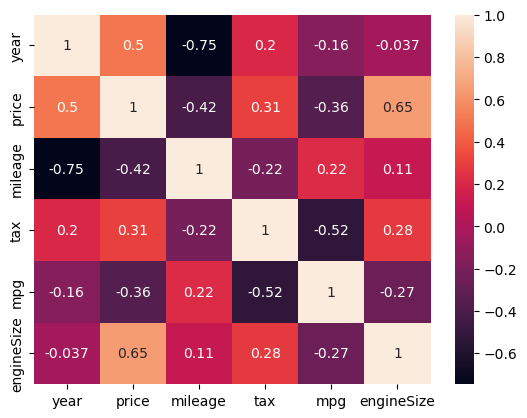

In [21]:
numerical_columns = ['year', 'price', 'mileage', 'tax', 'mpg', 'engineSize']
numerical_data = df[numerical_columns]

sns.heatmap(numerical_data.corr(), annot = True)

Showcasing the 20 most popular car models

Text(0, 0.5, 'Car Model')

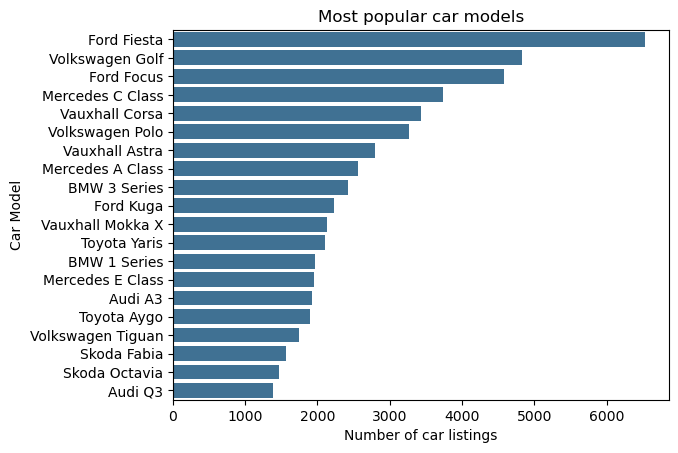

In [22]:
model_count = df['manufacturerModel'].value_counts().reset_index().head(20)

sns.barplot(data = model_count, x = 'count', y = 'manufacturerModel', color = '#3274A1')
plt.title('Most popular car models')
plt.xlabel('Number of car listings')
plt.ylabel('Car Model')

Showcasing the most expensive car models

Text(0, 0.5, 'Car Model')

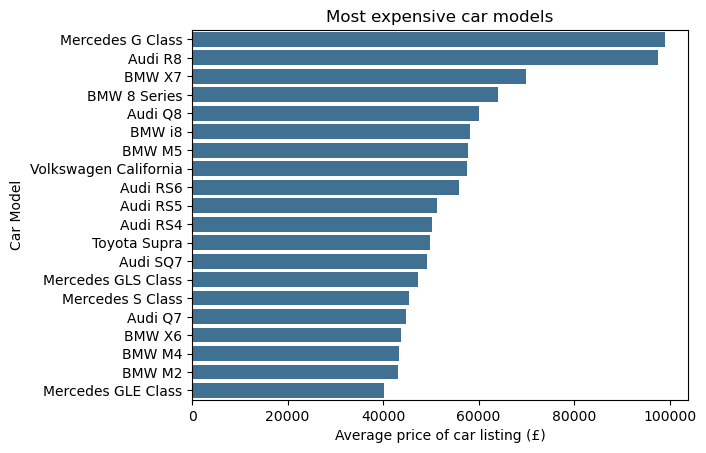

In [23]:
model_price = df.groupby(['manufacturerModel'])['price'].mean().reset_index().sort_values(by = 'price', ascending = False).head(20)

sns.barplot(data = model_price, x = 'price', y = 'manufacturerModel', color = '#3274A1')
plt.title('Most expensive car models')
plt.xlabel('Average price of car listing (£)')
plt.ylabel('Car Model')

Displaying the differences between the most popular car model Ford Fiesta and most expensive model Mercedes G Class
The Fiesta is a lot cheaper while still having a similar average age and mileage
The G Class has a much lower miles per galon and much larger engine size

In [24]:
fiesta_data = df[df['model'] == 'Fiesta']
gClass_data = df[df['model'] == 'G Class']

display(fiesta_data.describe(), gClass_data.describe())

,year,price,mileage,tax,mpg,engineSize
count,6536.000000,6536.000000,6536.000000,6536.000000,6536.000000,6536.000000
mean,2016.802938,10196.129131,21677.827723,100.898103,60.978764,1.101209
std,1.968621,2886.168431,16237.388672,64.343995,7.806441,0.176231
min,2000.000000,694.000000,1.000000,0.000000,38.200000,1.000000
25%,2016.000000,8295.000000,10266.000000,20.000000,54.300000,1.000000
50%,2017.000000,9995.000000,17825.500000,145.000000,62.800000,1.000000
75%,2018.000000,11695.000000,29118.250000,145.000000,65.700000,1.200000
max,2020.000000,25999.000000,119902.000000,265.000000,88.300000,2.000000


,year,price,mileage,tax,mpg,engineSize
count,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000
mean,2016.933333,98934.200000,19093.733333,284.000000,23.000000,3.866667
std,2.404361,42022.630101,15610.001183,190.142803,4.794342,0.812111
min,2012.000000,44990.000000,1350.000000,145.000000,11.000000,3.000000
25%,2015.500000,63449.000000,9345.500000,145.000000,21.400000,3.000000
50%,2018.000000,99850.000000,13046.000000,150.000000,21.400000,4.000000
75%,2018.500000,137859.500000,26700.000000,447.500000,25.200000,4.000000
max,2020.000000,159999.000000,52438.000000,580.000000,30.400000,5.500000


Creating a scatterplot to further analyse the effect of mileage on price
While there are a lot of cars with under 10,000 miles, the price appears to fluctuate wildly depending on the manufacturer

C:\Users\samue\AppData\Local\Temp\ipykernel_21620\2716205718.py:2: UserWarning: The figure layout has changed to tight
  g.fig.tight_layout()
C:\Users\samue\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


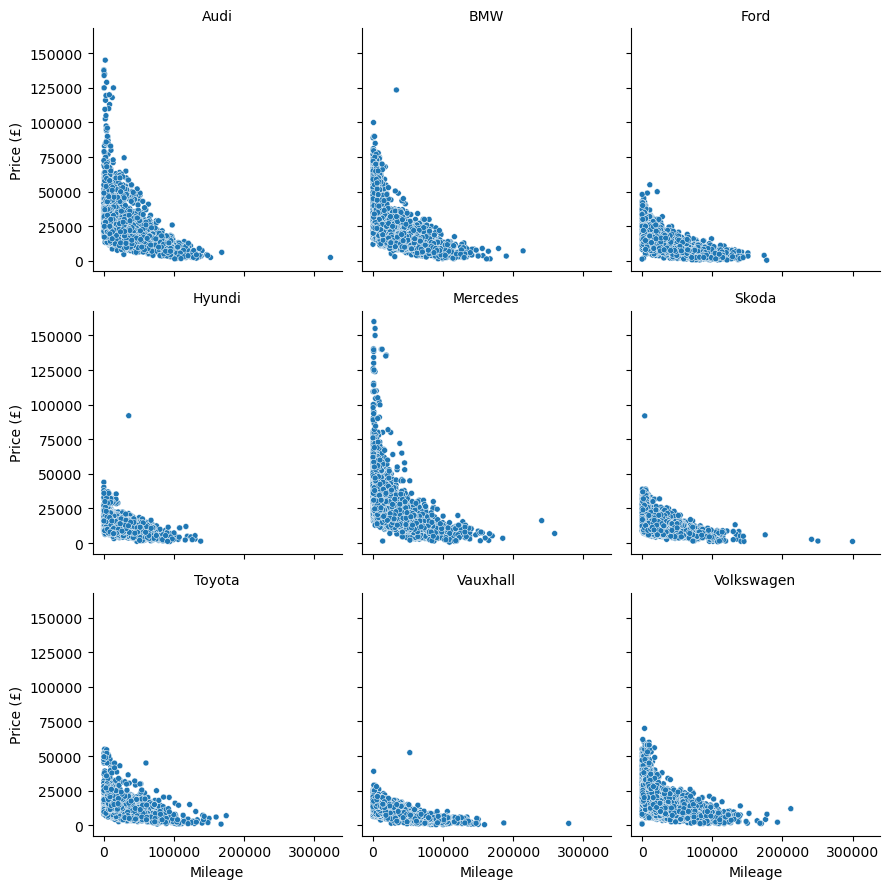

In [25]:
g = sns.FacetGrid(df, col = 'manufacturer', col_wrap = 3, height = 3)
g.fig.tight_layout()

g.map_dataframe(sns.scatterplot, x = 'mileage', y = 'price', size = 1)
g.set_titles(col_template = '{col_name}')
g.set_axis_labels('Mileage', 'Price (£)')

Creating a price to mileage index to check the effect of the manufacturer on the price of the car despite the same mileage
A Vauxhall with 50,000 miles could be valued at £22,146.55 while a Mercedes with 50,000 miles could be valued at £56,406.20

In [26]:
price_mileage_index = df.groupby('manufacturer').apply(lambda x: x['price'].mean() / x['mileage'].mean()).sort_values(ascending = False)

print(price_mileage_index)

manufacturer
Mercedes      1.128124
Audi          0.917972
BMW           0.897008
Volkswagen    0.759586
Skoda         0.709145
Hyundi        0.595288
Toyota        0.545078
Ford          0.525520
Vauxhall      0.442931
dtype: float64


Checking the popularity of different fuel types over the years
Diesel was more popular than petrol from 2012 to 2016

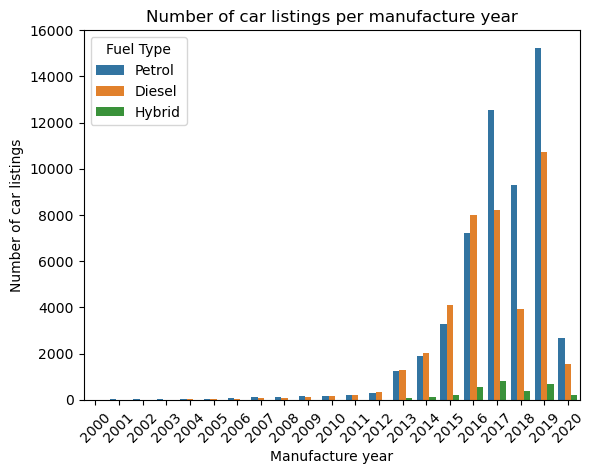

In [27]:
year_fuel_size = df.groupby(['year', 'fuelType']).size().reset_index(name = 'size')

sns.barplot(data = year_fuel_size, x = 'year', y = 'size', hue = 'fuelType')
plt.title('Number of car listings per manufacture year')
plt.xlabel('Manufacture year')
plt.xticks(rotation = 45)
plt.ylabel('Number of car listings')
plt.legend(loc = 'upper left', title = 'Fuel Type')

Showcasing how the age of the car effects the price

Text(0, 0.5, 'Avergae price of car listing (£)')

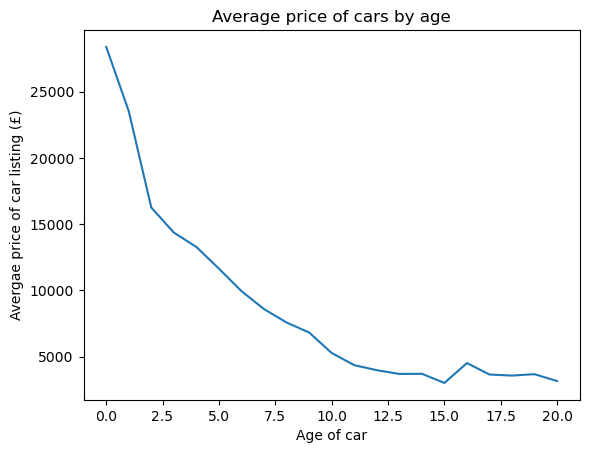

In [28]:
df['age'] = 2020 - df['year']
age_price = df.groupby(['year'])['price'].mean().reset_index(name = 'age_price').sort_values(by = 'age_price')
age_price['age'] = 2020 - age_price['year']

sns.lineplot(data = age_price, x = 'age', y = 'age_price')
plt.title('Average price of cars by age')
plt.xlabel('Age of car')
plt.ylabel('Avergae price of car listing (£)')

Plotting a line of best fit

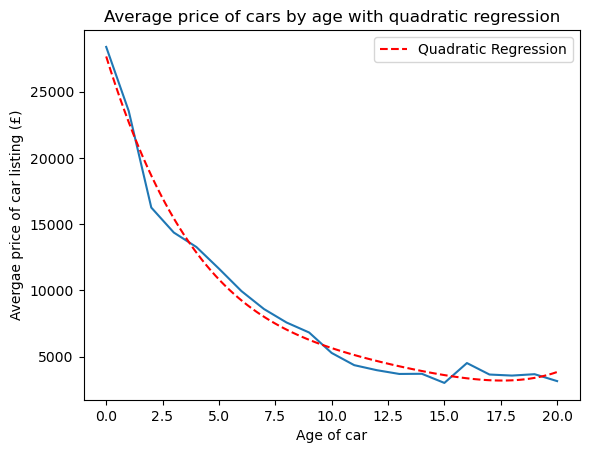

In [29]:
age_price = df.groupby(['year'])['price'].mean().reset_index(name = 'age_price').sort_values(by = 'age_price')
age_price['age'] = 2020 - age_price['year']

poly_coeffs = np.polyfit(age_price['age'], age_price['age_price'], 4)
poly = np.poly1d(poly_coeffs)
age_values = np.linspace(age_price['age'].min(), age_price['age'].max(), 100)
price_values = poly(age_values)

sns.lineplot(data = age_price, x = 'age', y = 'age_price')
plt.plot(age_values, price_values, color = 'red', linestyle = '--', label = 'Quadratic Regression')
plt.title('Average price of cars by age with quadratic regression')
plt.xlabel('Age of car')
plt.ylabel('Avergae price of car listing (£)')
plt.legend()

Showcasing the effect of the car's transmission type on price
The f-statistic and p-values show that the variation among the average price is significant

Text(0, 0.5, 'Average Price (£)')

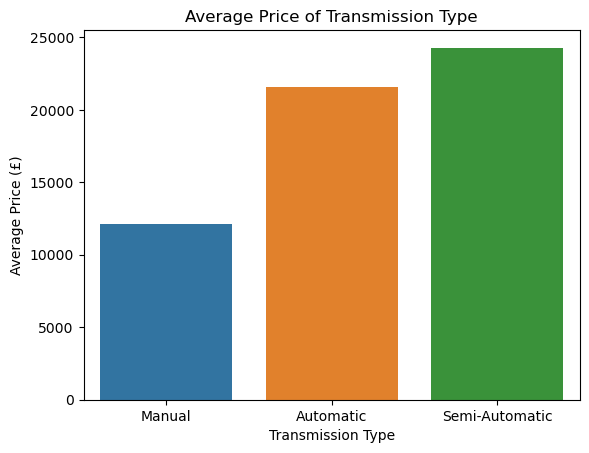

In [30]:
sns.barplot(data = df, x = 'transmission', y = 'price', errorbar = None)
plt.title('Average Price of Transmission Type')
plt.xlabel('Transmission Type')
plt.ylabel('Average Price (£)')

In [31]:
manual_price = df[df['transmission'] == 'Manual']['price']
automatic_price = df[df['transmission'] == 'Automatic']['price']
semi_automatic_price = df[df['transmission'] == 'Semi-Automatic']['price']

f_statistic, p_value = f_oneway(manual_price, automatic_price, semi_automatic_price)

print('F-statistic:', f_statistic)
print('P-value:', p_value)

F-statistic: 21954.09438665724
P-value: 0.0


# Cluster Analysis

Using silhouette scores to determine number of clusters

In [32]:
df_encoded = df.drop(columns = ['model', 'manufacturerModel'])
df_encoded = pd.get_dummies(df_encoded, columns = ['transmission', 'manufacturer', 'fuelType'])
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_encoded)

kmeans_per_k = [KMeans(n_clusters = k, random_state = 42, n_init = 10).fit(df_scaled) for k in range(2, 10)]

silhouette_scores = [silhouette_score(df_scaled, model.labels_) for model in kmeans_per_k]

silhouette_scores

[0.1678351071515025,
 0.15695786235493342,
 0.1701424370311645,
 0.14800571622754113,
 0.1713741380334389,
 0.18623727496916798,
 0.20825041199911967,
 0.28322769412976784]

Text(0.5, 1.0, 'Silhouette score vs number of clusters')

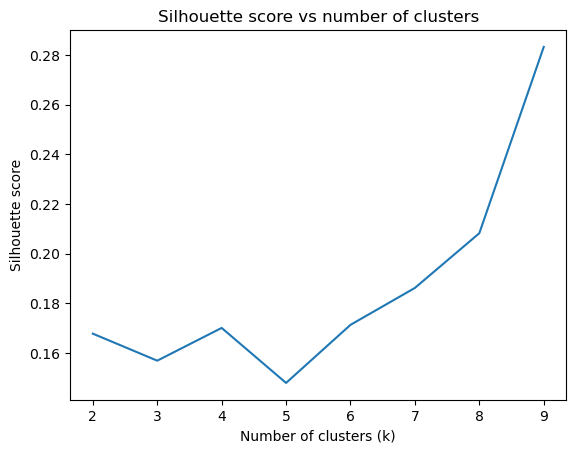

In [33]:
plt.plot(range(2, 10), silhouette_scores)
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette score')
plt.title('Silhouette score vs number of clusters')

In [34]:
k = 8
kmeans = KMeans(n_clusters = k, random_state = 42, n_init = 10)
kmeans.fit(df_scaled)

cluster_labels = kmeans.labels_

df['cluster'] = cluster_labels

df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,manufacturer,manufacturerModel,age,cluster
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4,Audi,Audi A1,3,3
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0,Audi,Audi A6,4,7
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4,Audi,Audi A1,4,3
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0,Audi,Audi A4,3,5
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0,Audi,Audi A3,1,3


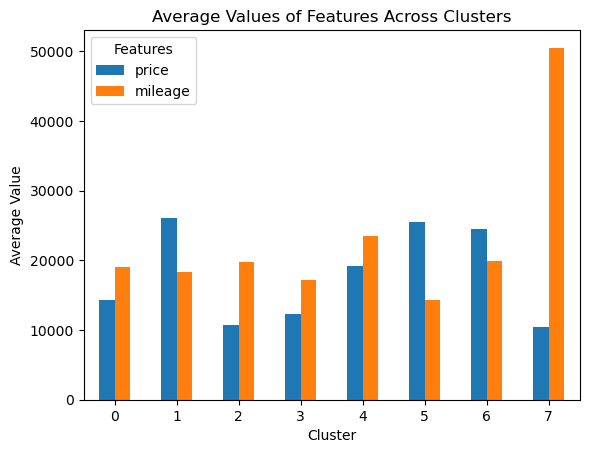

In [35]:
cluster_groups = df.groupby('cluster')
cluster_means = cluster_groups[['price', 'mileage']].mean()

cluster_means.plot(kind = 'bar')
plt.title('Average Values of Features Across Clusters')
plt.xlabel('Cluster')
plt.ylabel('Average Value')
plt.xticks(rotation=0)
plt.legend(title = 'Features')

C:\Users\samue\AppData\Local\Temp\ipykernel_21620\2444752765.py:2: UserWarning: The figure layout has changed to tight
  g.fig.tight_layout()
C:\Users\samue\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


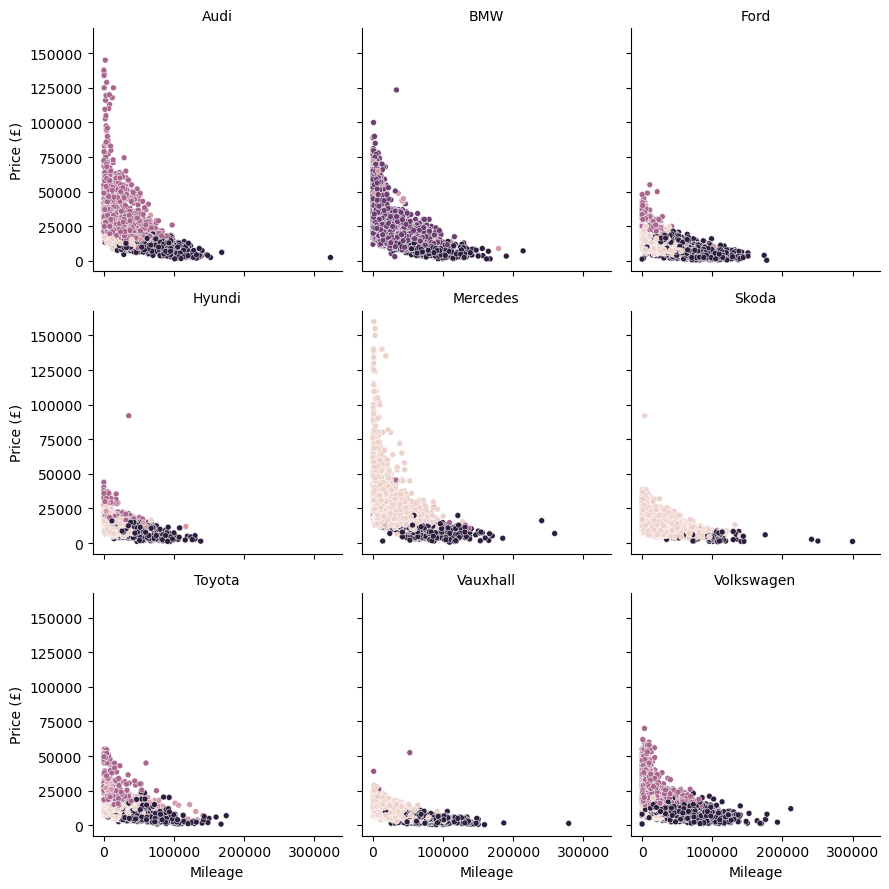

In [36]:
g = sns.FacetGrid(df, col = 'manufacturer', col_wrap = 3, height = 3)
g.fig.tight_layout()

g.map_dataframe(sns.scatterplot, x = 'mileage', y = 'price', size = 1, hue = 'cluster')
g.set_titles(col_template = '{col_name}')
g.set_axis_labels('Mileage', 'Price (£)')

In [37]:
df_cluster_summary = cluster_groups.agg({
    'model': lambda x: x.mode()[0],
    'year': 'mean',
    'price': 'mean',
    'transmission': lambda x: x.mode()[0],
    'mileage': 'mean',
    'fuelType': lambda x: x.mode()[0],
    'mpg': 'mean',
    'engineSize': 'mean',
    'manufacturer': lambda x: x.mode()[0],
    'cluster': 'size'
})

display(df_cluster_summary)

,model,year,price,transmission,mileage,fuelType,mpg,engineSize,manufacturer,cluster
cluster,,,,,,,,,,
0,Fabia,2017.575772,14353.759187,Manual,19071.545366,Petrol,56.167724,1.431285,Skoda,6150
1,C Class,2017.656002,26063.592270,Semi-Automatic,18276.451583,Diesel,53.725459,2.092270,Mercedes,11721
2,Corsa,2017.275741,10770.209189,Manual,19734.195422,Petrol,50.098560,1.393923,Vauxhall,12276
3,Fiesta,2017.374322,12277.001432,Manual,17199.618030,Petrol,55.800249,1.215506,Ford,26544
4,Yaris,2017.151525,19163.823939,Automatic,23549.697613,Hybrid,85.355172,1.790053,Toyota,3016
5,Golf,2018.169073,25440.224914,Semi-Automatic,14268.375114,Diesel,45.896866,2.018928,Audi,14201
6,3 Series,2017.571005,24525.340101,Semi-Automatic,19948.609636,Diesel,51.436578,2.222959,BMW,9112
7,Golf,2014.577431,10453.006725,Manual,50519.527732,Diesel,62.122691,1.761438,Ford,15614


In [38]:
cluster_groups = df.groupby('cluster')

for cluster, cluster_df in cluster_groups:
    print(f"Cluster {cluster}\n"
      f"{cluster_df['manufacturer'].value_counts()}"
      f"{cluster_df['transmission'].value_counts()}"
      f"{cluster_df['fuelType'].value_counts()}\n")

Cluster 0
manufacturer
Skoda    6150
Name: count, dtype: int64transmission
Manual            3671
Semi-Automatic    1391
Automatic         1088
Name: count, dtype: int64fuelType
Petrol    4152
Diesel    1998
Name: count, dtype: int64

Cluster 1
manufacturer
Mercedes    11721
Name: count, dtype: int64transmission
Semi-Automatic    6745
Automatic         4347
Manual             629
Name: count, dtype: int64fuelType
Diesel    8275
Petrol    3442
Hybrid       4
Name: count, dtype: int64

Cluster 2
manufacturer
Vauxhall    12276
Name: count, dtype: int64transmission
Manual            10741
Automatic          1086
Semi-Automatic      449
Name: count, dtype: int64fuelType
Petrol    10611
Diesel     1665
Name: count, dtype: int64

Cluster 3
manufacturer
Ford          12411
Volkswagen     5992
Toyota         3868
Hyundi         2640
Audi           1440
Mercedes        177
BMW              16
Name: count, dtype: int64transmission
Manual            24014
Automatic          1332
Semi-Automatic    

Cluster 0: All Audis, Average age, 2nd highest price, 2nd highest mileage, worst mpg, 3rd largest engine size

Cluster 1: All Volkawagens, Younger age, highest manual/petrol price, 3rd lowest mileage, average mpg, average engine size, 2nd largest cluster

Cluster 2: Oldest age, 2nd lowest price, average mileage, highest petrol mpg, smallest engine size, largest cluster

Cluster 3: 95% Mercedes, 2nd youngest age, highest price, 2nd lowest mileage, highest diesel mpg, 2nd largest engine size

Cluster 4: Slightly younger age, high price, automatic, average mileage, hybrid, highest mpg, large engine size, smallest cluster

Cluster 5: 99% BMWs, Average age, 3rd highest price, highest mileage, high diesel mpg, largest engine size

Cluster 6: All Vauxhalls, 2nd oldest age, lowest price, highest manual/petrol mileage, lowest petrol mpg, average petrol engine size

Cluster 7: All Skodas, Youngest age, 2nd highest manual/petrol price, lowest mileage, 2nd highest petrol/diesel mpg, average engine size, 2nd smallest cluster


Cluster 0 contains almost every Audi. The group is expensive and has the lowest mpg with a fairly even split of petrol and diesel engines

Cluster 1 contains almost every Volkswagen. The group is mostly petrol engines and is a more expensive budget option

Cluster 2 contains a majority of Fords but also includes Toyotas and Hyundis. The cars are the oldest with the smallest engine sizes and best liquid fuel mpg

Cluster 3 contains mostly Mercedes. The group is newer, cheaper, lower mileage, better mpg, a larger average engine size and comprises of more automatic and semi-automatic transmission types than the Audis in  Cluster 0

Cluster 4 contains all hybrid cars. The group is more expensive than the predominantly petrol groups and is mostly automatic transmission types. The cluster is the smallest of the dataframe

Cluster 5 contains mostly BMWs. The group is cheaper than the Audis and Mercedes in clusters 0 and 3 with the highest mileage and largest engine size of any cluster

Cluster 6 contains almost every Vauxhall. The group is the cheapest and has the lowest mpg of any cluster

Cluster 7 contains almost every Skoda. The cluster is the second smallest with the newest cars, the lowest mileage and 2nd highest mpg of liquid fuel engines